<h1 style="color:green;"> Loading data from huging face  </h1>  <h2 

In [1]:
import pandas as pd
from datasets import load_dataset

# Charger le dataset depuis Hugging Face

dataset = load_dataset("7Xan7der7/us_airline_sentiment")



In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 14640
    })
})


In [4]:
df = dataset["train"].to_pandas()
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,None,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,None,2/24/2015 11:35,None,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,None,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,None,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,None,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,None,2/24/2015 11:14,None,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695880e+17,positive,0.3487,None,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,None,2/22/2015 12:01,None,None
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,None,2/22/2015 11:59,Texas,None
14637,5.695870e+17,neutral,1.0000,None,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,None,2/22/2015 11:59,"Nigeria,lagos",None
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",None,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [5]:
print(df.dtypes, '\n')

print(df.groupby("airline_sentiment")["airline_sentiment"].count())

tweet_id                        float64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object 

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [6]:
print(df["airline_sentiment"].isna().sum())
print(df["text"].isna().sum())

0
0


In [7]:
num_cols = df.select_dtypes(include=["int64","float64"])

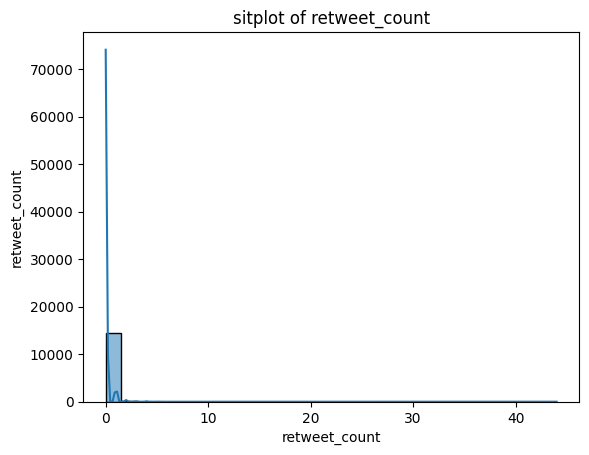

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.histplot(df["retweet_count"], kde = True, bins=30)
plt.title(f'sitplot of {"retweet_count"}')
plt.ylabel("retweet_count")

plt.show()

<h1 style="color:orange;"> Check les doublant  </h1>



In [9]:
df.duplicated().sum()

np.int64(39)

In [10]:
df_cleand = df.drop_duplicates()


In [11]:
from nltk.corpus import stopwords
import nltk

# Téléchargez les ressources NLTK nécessaires si ce n'est pas déjà fait
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


df_cleand["cleaned_text"] = (
df_cleand["text"]
.str.lower()                                   # minuscules
.str.replace(r'http\S+|www\S+', '', regex=True) # suppression des URLs
.str.replace(r'@\w+', '', regex=True)           # suppression des mentions
.str.replace(r'#\w+', '', regex=True)           # suppression des hashtags
.str.replace(r'[^a-z0-9\s]', '', regex=True)    # ponctuation & caractères spéciaux
.str.replace(r'\s+', ' ', regex=True)           # espaces multiples → 1 espace
.str.strip()                                    # suppression espaces début/fin
.str.strip()
)

stop_words = set(stopwords.words("english"))

def stop_words_remover(text): 
    tokens = text.split()
    tokens_filter = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens_filter)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ycode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ycode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ycode\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ycode\AppData\Local\Temp\ipykernel_35972\1447476433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleand["cleaned_text"] = (


In [12]:
df_cleand["cleaned_text"] = df_cleand["cleaned_text"].apply(lambda x: stop_words_remover(x))

C:\Users\ycode\AppData\Local\Temp\ipykernel_35972\4024338273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleand["cleaned_text"] = df_cleand["cleaned_text"].apply(lambda x: stop_words_remover(x))


In [15]:
df_cleand = df_cleand[["airline_sentiment","cleaned_text"]]

In [16]:
df_cleand.to_csv("../data/data.csv", index=False)